## Importing required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use(["seaborn-bright","dark_background"])

## Importing required dataset.

In [2]:
data = pd.read_csv("http://bit.ly/w-data")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.shape

(25, 2)

### Ploting Regression Plot.

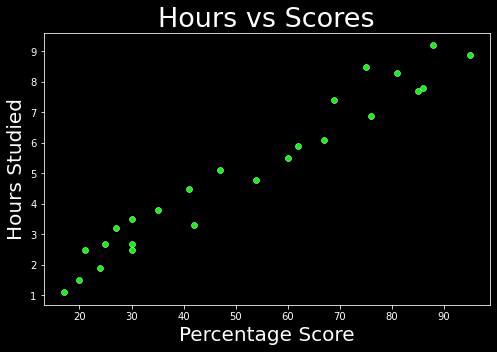

In [4]:
plt.figure(figsize=(8,5))
sns.scatterplot(data["Scores"],data["Hours"],color="lime")
plt.title("Hours vs Scores",fontsize=27)
plt.xlabel("Percentage Score",fontsize = 20)
plt.ylabel("Hours Studied",fontsize = 20)
plt.show()

### Plotting the countplot.

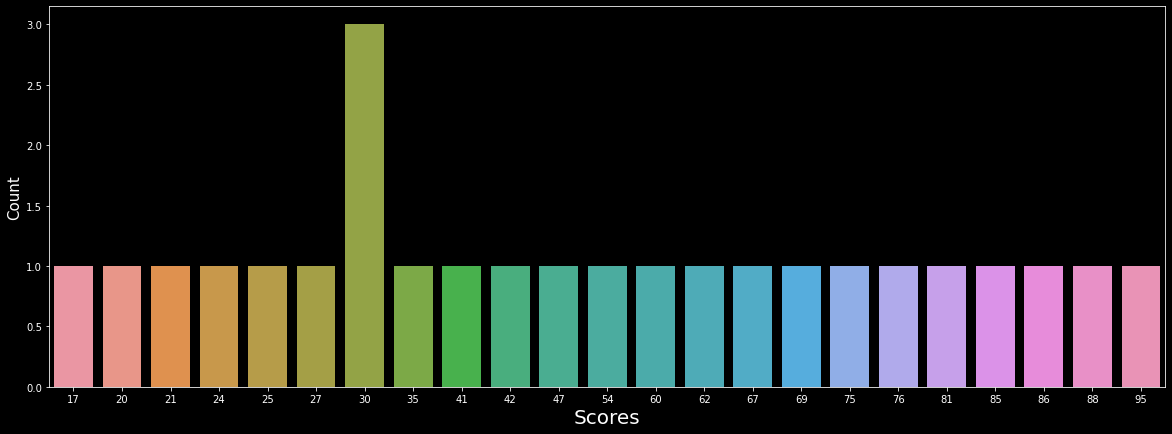

In [5]:
plt.figure(figsize=(20,7))
sns.countplot(data["Scores"])
plt.xlabel("Scores",fontsize=20)
plt.ylabel("Count",fontsize=15)
plt.show()

#### Most of the students score 30

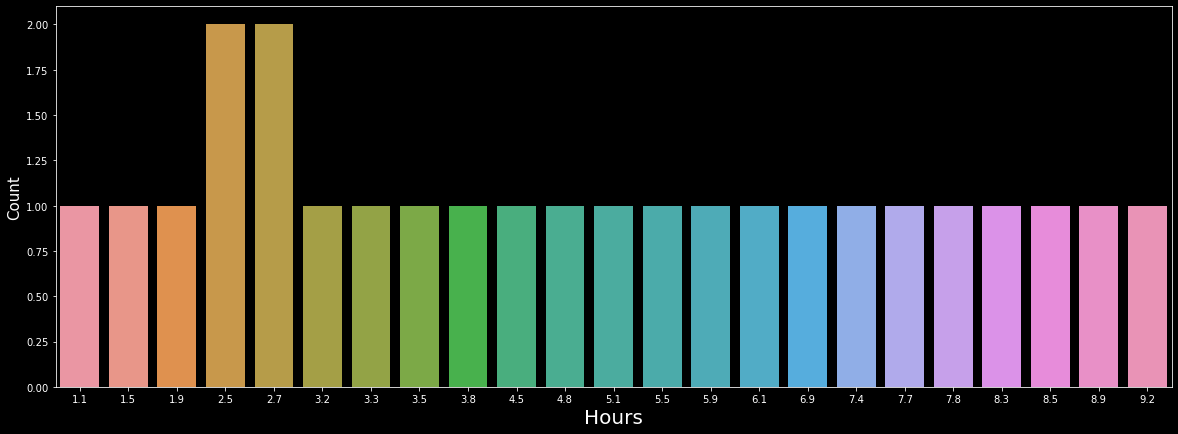

In [6]:
plt.figure(figsize=(20,7))
sns.countplot(data["Hours"])
plt.xlabel("Hours",fontsize=20)
plt.ylabel("Count",fontsize=15)
plt.show()

#### Most of the students studies 2.5-2.7 hours.

## Ploting Histogram.

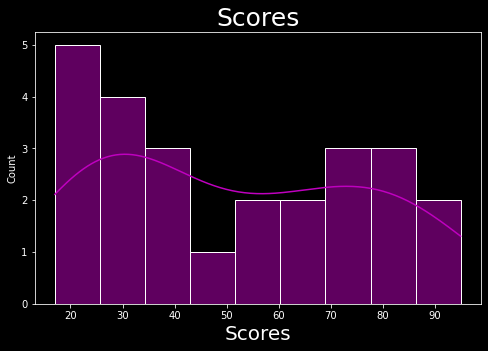

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(data["Scores"],kde=True,color="m",bins=9)
plt.title("Scores",fontsize=25)
plt.xlabel("Scores",fontsize = 20)
plt.show()

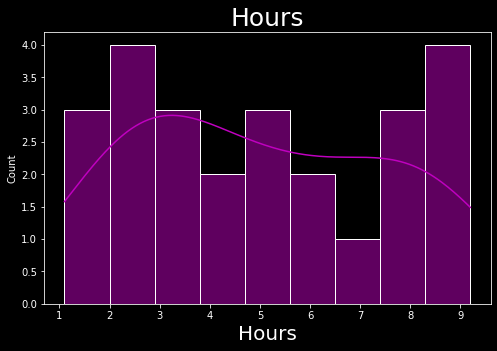

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(data["Hours"],kde=True,color="m",bins=9)
plt.title("Hours",fontsize=25)
plt.xlabel("Hours",fontsize = 20)
plt.show()

## Ploting boxplot.

<Figure size 432x288 with 0 Axes>

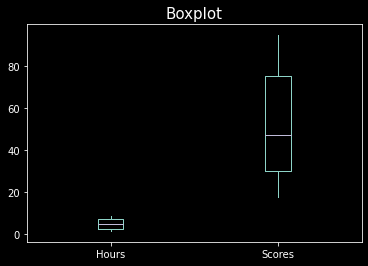

In [9]:
plt.figure(figsize=(6,4))
data.plot(kind="box")
plt.title("Boxplot",fontsize=15)
plt.show()

In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
def function(x):
    if x<35:
        return "bad"
    elif 35<=x<=50:
        return "fair"
    elif 50<x<75:
        return "average"
    elif 75<=x<=90:
        return "good"
    else:
        return "excellent"
        

In [12]:
data["Grade"] = data["Scores"].apply(function)

### Plotting pie plot for grades.

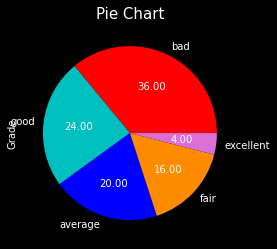

In [13]:
plt.figure(figsize=(10,4))
data["Grade"].value_counts().plot(kind = "pie",autopct="%.2f",colors = ["r","c","b","darkorange","orchid"])
plt.title("Pie Chart",fontsize=15)
plt.show()

In [14]:
data.drop(columns=["Grade"],inplace=True)

In [15]:

X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values  

### Spliting dataset into train and test.

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

### Training the regression model.

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [18]:
print("X_train shape = {} X_test shape = {}\nY_train shape = {} Y_test shape = {}".format(x_train.shape,x_test.shape,
                                                                                         y_train.shape,y_test.shape))

X_train shape = (20, 1) X_test shape = (5, 1)
Y_train shape = (20,) Y_test shape = (5,)


In [19]:
model.fit(x_train,y_train)

LinearRegression()

### Accuracy Score.

In [20]:
print("Train score = {}".format(model.score(x_train,y_train)))
print("Test score = {}".format(model.score(x_test,y_test)))

Train score = 0.9515510725211552
Test score = 0.9454906892105354


In [21]:
pred = model.predict(x_train)

### Plotting regression line.

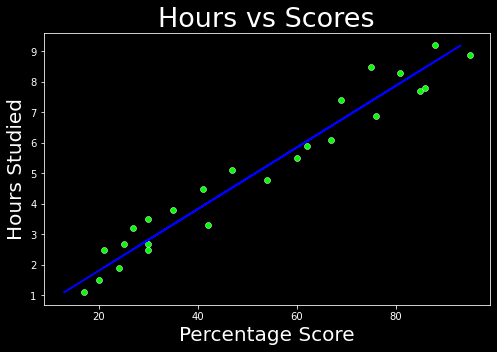

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(data["Scores"],data["Hours"],color="lime")
plt.plot(pred,x_train,color="b")
plt.title("Hours vs Scores",fontsize=27)
plt.xlabel("Percentage Score",fontsize = 20)
plt.ylabel("Hours Studied",fontsize = 20)
plt.show()

### Evaluation of model using root mean square error.

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
train_mse = mean_squared_error(y_train,model.predict(x_train))
test_mse = mean_squared_error(y_test,model.predict(x_test))

In [25]:
print("RMSE for train data = {}".format(np.sqrt(train_mse)))
print("RMSE for test data = {}".format(np.sqrt(test_mse)))

RMSE for train data = 5.558613350226344
RMSE for test data = 4.647447612100373


### Predicting percentage score for 9.25 hrs/day. 

In [26]:
hours = 9.25
pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539
